In [1]:
!wget https://github.com/ChanCheeKean/datasets/blob/main/h5/deep_learning_h5.zip?raw=true
!unzip -qq deep_learning_h5.zip?raw=true

--2022-10-10 08:12:44--  https://github.com/ChanCheeKean/datasets/blob/main/h5/deep_learning_h5.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ChanCheeKean/datasets/raw/main/h5/deep_learning_h5.zip [following]
--2022-10-10 08:12:44--  https://github.com/ChanCheeKean/datasets/raw/main/h5/deep_learning_h5.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ChanCheeKean/datasets/main/h5/deep_learning_h5.zip [following]
--2022-10-10 08:12:45--  https://raw.githubusercontent.com/ChanCheeKean/datasets/main/h5/deep_learning_h5.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:4

In [7]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from lib.cnn_utils import *

# 1) Data Loading

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(1080, 64, 64, 3)
(120, 64, 64, 3)
(1080, 1)


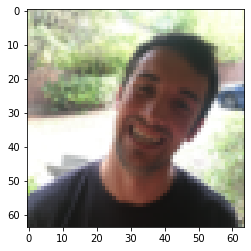

In [ ]:
index = 90
plt.imshow(X_train_orig[index])
plt.show()

# 2) Sequential API

## 2.1 Model Building

In [ ]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    """
    input_shape = (64, 64, 3)
    model = tf.keras.Sequential([
            tf.keras.Input(shape=input_shape),
            # ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            # (m, 70, 70, 3)
            tfl.ZeroPadding2D(padding=(3, 3)),

            # Conv2D with 32 7x7 filters and stride of 1
            # (m, 64, 64, 32)
            tfl.Conv2D(filters=32, strides=(1, 1), kernel_size=(7, 7)),

            # BatchNormalization for axis 3
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),

            # Max Pooling 2D with default parameters
            # (m, 32, 32, 32)
            tfl.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),

            # Flatten layer
            tfl.Flatten(),
            # Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(units = 1, activation='sigmoid')            
        ])
    
    return model

In [ ]:
happy_model = happyModel()
for layer in summary(happy_model):
    print(layer)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [ ]:
happy_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
happy_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_9 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_16 (ReLU)              (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [ ]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 94ms/step - loss: 0.8053 - accuracy: 0.7833
Epoch 2/10
38/38 [==============================] - 3s 90ms/step - loss: 0.2409 - accuracy: 0.8917
Epoch 3/10
38/38 [==============================] - 3s 87ms/step - loss: 0.2202 - accuracy: 0.9133
Epoch 4/10
38/38 [==============================] - 3s 87ms/step - loss: 0.1999 - accuracy: 0.9233
Epoch 5/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0720 - accuracy: 0.9817
Epoch 6/10
38/38 [==============================] - 3s 90ms/step - loss: 0.1128 - accuracy: 0.9633
Epoch 7/10
38/38 [==============================] - 3s 90ms/step - loss: 0.1217 - accuracy: 0.9583
Epoch 8/10
38/38 [==============================] - 3s 92ms/step - loss: 0.0666 - accuracy: 0.9733
Epoch 9/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0634 - accuracy: 0.9833
Epoch 10/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0784 - accuracy: 0.9750


## 2.2 Evaluation

In [ ]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 29ms/step - loss: 0.1196 - accuracy: 0.9400


[0.11964569240808487, 0.9399999976158142]

# 3) Functional API

## 3.1 Data Loading

In [ ]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 4


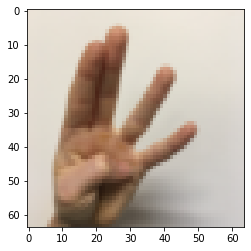

In [ ]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


## 3.2 Forward Propagation
**Window, kernel, filter, pool**

The words "kernel" and "filter" are used to refer to the same thing. The word "filter" accounts for the amount of "kernels" that will be used in a single convolution layer. "Pool" is the name of the operation that takes the max or average value of the kernels. 

This is why the parameter `pool_size` refers to `kernel_size`, and you use `(f,f)` to refer to the filter size. 

Pool size and kernel size refer to the same thing in different objects - They refer to the shape of the window where the operation takes place. 

In [ ]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)

    # CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(8, (4, 4), strides=(1, 1), padding="same")(input_img)
    A1 = tfl.ReLU()(Z1)

    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPooling2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)

    # CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tfl.Conv2D(16, (2,2), strides=(1, 1), padding="same")(P1)
    A2 = tfl.ReLU()(Z2)

    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    
    # FLATTEN
    F = tfl.Flatten()(P2)
    # Dense layer with softmax
    outputs = tfl.Dense(units = 6, activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
conv_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)          0   

## 3.3 Model Training

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 3s 120ms/step - loss: 1.8255 - accuracy: 0.1650 - val_loss: 1.7942 - val_accuracy: 0.1750
Epoch 2/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7907 - accuracy: 0.1800 - val_loss: 1.7892 - val_accuracy: 0.1667
Epoch 3/100
17/17 [==============================] - 2s 108ms/step - loss: 1.7854 - accuracy: 0.1645 - val_loss: 1.7863 - val_accuracy: 0.1917
Epoch 4/100
17/17 [==============================] - 2s 105ms/step - loss: 1.7822 - accuracy: 0.2073 - val_loss: 1.7848 - val_accuracy: 0.2000
Epoch 5/100
17/17 [==============================] - 2s 104ms/step - loss: 1.7800 - accuracy: 0.2330 - val_loss: 1.7825 - val_accuracy: 0.2167
Epoch 6/100
17/17 [==============================] - 2s 107ms/step - loss: 1.7767 - accuracy: 0.2519 - val_loss: 1.7810 - val_accuracy: 0.2333
Epoch 7/100
17/17 [==============================] - 2s 107ms/step - loss: 1.7743 - accuracy: 0.2886 - val_loss: 1.7783 - val_accuracy: 0.2667

## 3.4 Evaluation

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

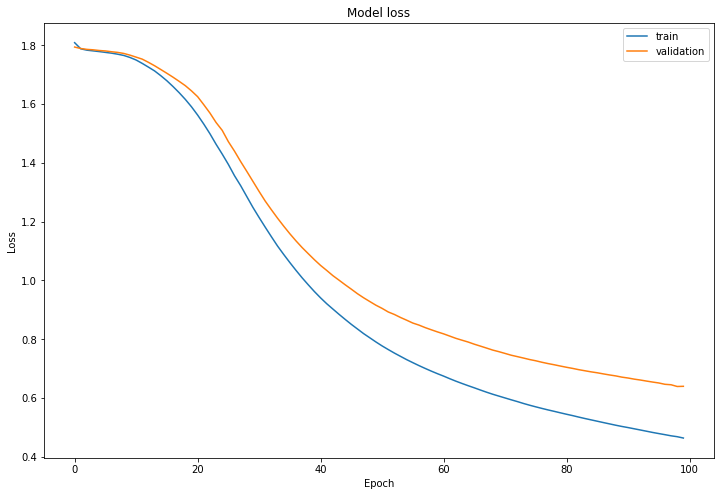

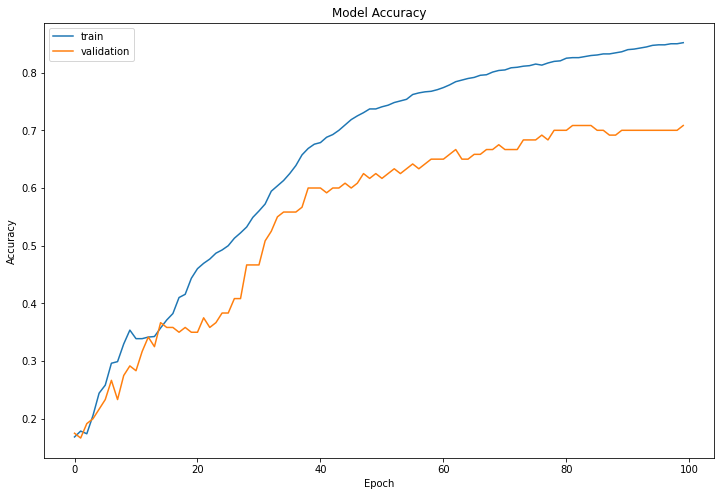

In [ ]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')